In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score,classification_report
from sklearn import preprocessing
from sklearn.feature_selection import RFE


In [151]:
players_data = pd.read_csv('FIFA22_PLAYERSDATA.csv',index_col=0)
players_data

,name,player_positions,overall,potential,value_eur,age,club_name,international_reputation,shooting,passing,...,mentality_positioning,mentality_vision,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
1,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,36,Manchester United,5,94.0,80.0,...,95,76,24,32,24,7,11,15,14,11
2,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,30,Manchester City,4,86.0,93.0,...,88,94,68,65,53,15,13,5,10,13
3,Harry Kane,ST,90,90,129500000.0,27,Tottenham Hotspur,4,91.0,83.0,...,94,87,50,36,38,8,10,11,14,11
4,N'Golo Kante,"CDM, CM",90,90,100000000.0,30,Chelsea,4,66.0,75.0,...,72,78,90,93,86,15,12,10,7,10
5,Son Heung-min,"LM, CF, LW",89,89,104000000.0,28,Tottenham Hotspur,4,87.0,82.0,...,91,83,50,34,33,11,13,13,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Reece Hannam,LB,53,69,240000.0,20,Crystal Palace,1,34.0,44.0,...,44,38,48,54,52,9,14,8,7,14
649,Ben Chrisene,"LB, LWB",53,78,275000.0,17,Aston Villa,1,42.0,53.0,...,55,52,48,43,44,5,6,10,9,12
650,Ossama Ashley,CM,52,64,200000.0,21,West Ham United,1,43.0,50.0,...,50,53,34,45,44,12,6,14,13,11
651,Pascal Juan Estrada,"CB, CM",51,65,130000.0,19,Wolverhampton Wanderers,1,43.0,49.0,...,34,47,50,52,51,9,9,12,6,7


In [78]:
def run_randomForest(x_train_,x_test,y_train,y_test):
    clf = RandomForestClassifier(n_estimators=300,random_state=0)
    rfModel = clf.fit(x_train_,y_train)
    y_pred = rfModel.predict(x_test)
    print("Accuracy: ",accuracy_score(y_test,y_pred))
    plot_confusion_matrix(clf,x_test,y_test,values_format='d',display_labels=['1','2','3','4','5','6','7','8','9','10','11','12'])

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
run_randomForest(x_train,x_test,y_train,y_test)

Accuracy:  0.10687022900763359


In [11]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=200, random_state=0,n_jobs=-1))
sel.fit(x_train,y_train)
sel.get_support()
x_train.columns

Index(['overall', 'potential', 'age', 'international_reputation', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_ball_control', 'movement_acceleration',
       'movement_sprint_speed', 'movement_agility', 'movement_reactions',
       'power_jumping', 'power_stamina', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes'],
      dtype='object')

In [10]:
sel.estimator_.feature_importances_

array([0.05258832, 0.0418837 , 0.02965743, 0.00808523, 0.02392912,
       0.0230835 , 0.02287612, 0.02146989, 0.02553301, 0.0302979 ,
       0.0263879 , 0.02753836, 0.02845452, 0.02794044, 0.02501485,
       0.02696604, 0.02827365, 0.03000756, 0.02989813, 0.02709249,
       0.03412077, 0.02964948, 0.03058262, 0.02718283, 0.02968279,
       0.02523758, 0.02720058, 0.02649122, 0.02663822, 0.02603503,
       0.02634196, 0.02792862, 0.02705201, 0.02628076, 0.02488257,
       0.02771482])

In [12]:
x_train_rfe = sel.transform(x_train)
x_test_rfe = sel.transform(x_test)


In [13]:
run_randomForest(x_train_rfe,x_test_rfe,y_train,y_test)

Accuracy:  0.11450381679389313


In [171]:
x = x.apply(lambda x:(x-x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))

In [157]:
a = 0
for i in players_data.loc[:,'value_eur']:
    if i in range(60000, 10060000):
        players_data.iloc[a,4] = '1'
    elif i in range(10060000, 20060000):
        players_data.iloc[a,4] = '2'
    elif i in range(20060000, 30060000):
        players_data.iloc[a,4] = '3'
    elif i in range(30060000, 40060000):
        players_data.iloc[a,4] = '4'
    elif i in range(40060000, 50060000):
        players_data.iloc[a,4] = '5'
    elif i in range(50060000, 60060000):
        players_data.iloc[a,4] = '6'
    elif i in range(60060000, 70060000):
        players_data.iloc[a,4] = '7'
    elif i in range(70060000, 80060000):
        players_data.iloc[a,4] = '8'
    elif i in range(80060000, 90060000):
        players_data.iloc[a,4] = '9'
    elif i in range(90060000, 100060000):
        players_data.iloc[a,4] = '10'
    elif i in range(100060000, 110060000):
        players_data.iloc[a,4] = '11'
    elif i in range(110060000, 130060000):
        players_data.iloc[a,4] = '12'
    a+=1

#players_data['value_eur'] = players_data.replace({'value_eur':range_key_dict})
#players_data.head()
players_data.head()

,name,player_positions,overall,potential,value_eur,age,club_name,international_reputation,shooting,passing,...,mentality_positioning,mentality_vision,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
1,Cristiano Ronaldo,"ST, LW",91,91,5,36,Manchester United,5,94.0,80.0,...,95,76,24,32,24,7,11,15,14,11
2,Kevin De Bruyne,"CM, CAM",91,91,12,30,Manchester City,4,86.0,93.0,...,88,94,68,65,53,15,13,5,10,13
3,Harry Kane,ST,90,90,12,27,Tottenham Hotspur,4,91.0,83.0,...,94,87,50,36,38,8,10,11,14,11
4,N'Golo Kante,"CDM, CM",90,90,10,30,Chelsea,4,66.0,75.0,...,72,78,90,93,86,15,12,10,7,10
5,Son Heung-min,"LM, CF, LW",89,89,11,28,Tottenham Hotspur,4,87.0,82.0,...,91,83,50,34,33,11,13,13,6,10


In [170]:
x = players_data.iloc[:,np.r_[2:4,5,7:40]]
y = players_data.iloc[:,4]
x

,overall,potential,age,international_reputation,shooting,passing,dribbling,defending,physic,attacking_crossing,...,mentality_positioning,mentality_vision,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
1,91,91,36,5,94.0,80.0,88.0,34.0,75.0,87,...,95,76,24,32,24,7,11,15,14,11
2,91,91,30,4,86.0,93.0,88.0,64.0,78.0,94,...,88,94,68,65,53,15,13,5,10,13
3,90,90,27,4,91.0,83.0,83.0,47.0,83.0,80,...,94,87,50,36,38,8,10,11,14,11
4,90,90,30,4,66.0,75.0,82.0,87.0,83.0,68,...,72,78,90,93,86,15,12,10,7,10
5,89,89,28,4,87.0,82.0,86.0,43.0,69.0,83,...,91,83,50,34,33,11,13,13,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,53,69,20,1,34.0,44.0,51.0,49.0,45.0,52,...,44,38,48,54,52,9,14,8,7,14
649,53,78,17,1,42.0,53.0,59.0,44.0,52.0,56,...,55,52,48,43,44,5,6,10,9,12
650,52,64,21,1,43.0,50.0,53.0,40.0,66.0,41,...,50,53,34,45,44,12,6,14,13,11
651,51,65,19,1,43.0,49.0,53.0,50.0,54.0,41,...,34,47,50,52,51,9,9,12,6,7


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
sel = SelectFromModel(RandomForestClassifier(n_estimators=200, random_state=0,n_jobs=-1))
sel.fit(x_train,y_train)
sel.get_support()

array([ True,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [12]:
features = x_train.columns[sel.get_support()]
features_list = features.to_list()
features_list

['overall',
 'potential',
 'age',
 'dribbling',
 'attacking_short_passing',
 'skill_ball_control',
 'movement_reactions']

In [149]:
print(np.around(sel.estimator_.feature_importances_,4))
fi = zip(x_train.columns,np.around(sel.estimator_.feature_importances_,4))
print (tuple(fi))

[0.1815 0.1245 0.0359 0.0125 0.0153 0.0176 0.0306 0.0214 0.0197 0.0176
 0.0159 0.016  0.0279 0.0108 0.0216 0.0159 0.0439 0.0131 0.0174 0.0138
 0.0731 0.0178 0.0263 0.0143 0.0149 0.0183 0.0173 0.0169 0.0172 0.0246
 0.018  0.0128 0.0121 0.0169 0.0113 0.0156]
(('overall', 0.1815), ('potential', 0.1245), ('age', 0.0359), ('international_reputation', 0.0125), ('shooting', 0.0153), ('passing', 0.0176), ('dribbling', 0.0306), ('defending', 0.0214), ('physic', 0.0197), ('attacking_crossing', 0.0176), ('attacking_finishing', 0.0159), ('attacking_heading_accuracy', 0.016), ('attacking_short_passing', 0.0279), ('attacking_volleys', 0.0108), ('skill_dribbling', 0.0216), ('skill_curve', 0.0159), ('skill_ball_control', 0.0439), ('movement_acceleration', 0.0131), ('movement_sprint_speed', 0.0174), ('movement_agility', 0.0138), ('movement_reactions', 0.0731), ('power_jumping', 0.0178), ('power_stamina', 0.0263), ('power_long_shots', 0.0143), ('mentality_aggression', 0.0149), ('mentality_interceptions'

In [143]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(8,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAME')

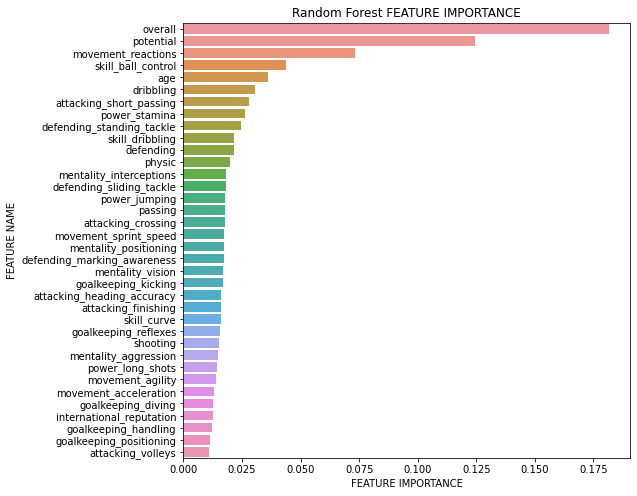

In [150]:
plot_feature_importance(np.around(sel.estimator_.feature_importances_,4),x_train.columns,'Random Forest ')

In [67]:
#Transform features data set to data set with selected features only
x_train_rfe = sel.transform(x_train)
x_test_rfe = sel.transform(x_test)

Accuracy:  0.9723926380368099
Wall time: 493 ms


C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


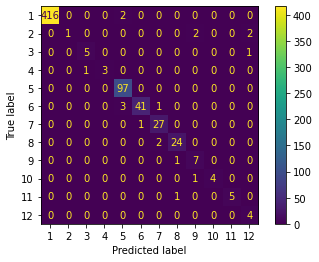

In [79]:
%%time
run_randomForest(x_train_rfe,x_fe,y_train,y)

In [63]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np


In [179]:
#transform all features data set to only selected features
x_fe = sel.transform(x)

In [211]:
#Split selected features data set
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(x_fe,y,test_size=0.2, random_state=0)

In [197]:
#Before feature selection
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

,overall,potential,age,international_reputation,shooting,passing,dribbling,defending,physic,attacking_crossing,...,mentality_positioning,mentality_vision,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
1,1.000,0.964286,0.909091,1.00,1.000000,0.860215,0.967033,0.373626,0.852273,0.917647,...,1.000000,0.742857,0.218391,0.265060,0.190476,0.024096,0.096386,0.142857,0.116279,0.091954
2,1.000,0.964286,0.636364,0.75,0.914894,1.000000,0.967033,0.703297,0.886364,1.000000,...,0.923077,1.000000,0.724138,0.662651,0.535714,0.120482,0.120482,0.032967,0.069767,0.114943
3,0.975,0.928571,0.500000,0.75,0.968085,0.892473,0.912088,0.516484,0.943182,0.835294,...,0.989011,0.900000,0.517241,0.313253,0.357143,0.036145,0.084337,0.098901,0.116279,0.091954
4,0.975,0.928571,0.636364,0.75,0.702128,0.806452,0.901099,0.956044,0.943182,0.694118,...,0.747253,0.771429,0.977011,1.000000,0.928571,0.120482,0.108434,0.087912,0.034884,0.080460
5,0.950,0.892857,0.545455,0.75,0.925532,0.881720,0.945055,0.472527,0.784091,0.870588,...,0.956044,0.842857,0.517241,0.289157,0.297619,0.072289,0.120482,0.120879,0.023256,0.080460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,0.050,0.178571,0.181818,0.00,0.361702,0.473118,0.560440,0.538462,0.511364,0.505882,...,0.439560,0.200000,0.494253,0.530120,0.523810,0.048193,0.132530,0.065934,0.034884,0.126437
649,0.050,0.500000,0.045455,0.00,0.446809,0.569892,0.648352,0.483516,0.590909,0.552941,...,0.560440,0.400000,0.494253,0.397590,0.428571,0.000000,0.036145,0.087912,0.058140,0.103448
650,0.025,0.000000,0.227273,0.00,0.457447,0.537634,0.582418,0.439560,0.750000,0.376471,...,0.505495,0.414286,0.333333,0.421687,0.428571,0.084337,0.036145,0.131868,0.104651,0.091954
651,0.000,0.035714,0.136364,0.00,0.457447,0.526882,0.582418,0.549451,0.613636,0.376471,...,0.329670,0.328571,0.517241,0.506024,0.511905,0.048193,0.072289,0.109890,0.023256,0.045977


In [231]:
#Fucntion to run XGBoost Model
def fit_model(alg,x_train,x_test,y_train,y_test):
    alg.fit(x_train,y_train,eval_metric='merror',verbose=20,eval_set=[(x_test,y_test)],early_stopping_rounds=20)
    pred = alg.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    print("Accuracy: %.4f%%" % (accuracy * 100.0))
    print(classification_report(y_test, pred))
    plot_confusion_matrix(alg,x_test,y_test)

In [177]:
#Hyperparameter values for XGBoost Classifier
xbg_classifier = xgb.XGBClassifier(
learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',
 nthread=4,
num_class=13,
 seed=0)
xgb_param = xbg_classifier.get_xgb_params()

[0]	validation_0-merror:0.22901
[20]	validation_0-merror:0.19847
[40]	validation_0-merror:0.19084


C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[55]	validation_0-merror:0.17557
Accuracy: 82.4427%
              precision    recall  f1-score   support

           1       0.99      0.98      0.98        87
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          12       0.50      0.50      0.50         2
           2       0.68      1.00      0.81        13
           3       0.43      0.43      0.43         7
           4       0.00      0.00      0.00         5
           5       0.50      0.57      0.53         7
           6       0.67      1.00      0.80         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         0

    accuracy                           0.82       131
   macro avg       0.31      0.37      0.34       131
weighted avg       0.79      0.82      0.80       131

Wall time: 463 ms


C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

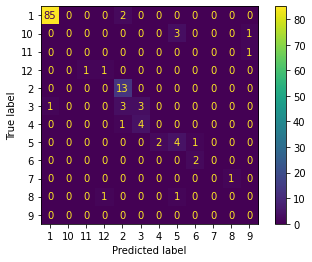

In [234]:
%%time
#Before feature selection (On testing data set)
fit_model(xbg_classifier,X_train,X_test,y_train,y_test)

In [216]:
y.value_counts()

1     418
2      97
3      45
4      28
5      26
6       8
11      6
8       6
10      5
7       5
12      4
9       4
Name: value_eur, dtype: int64

[0]	validation_0-merror:0.15951
[20]	validation_0-merror:0.04908
[40]	validation_0-merror:0.03834
[55]	validation_0-merror:0.03528


C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 96.4724%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       418
          10       1.00      0.20      0.33         5
          11       0.83      0.83      0.83         6
          12       0.75      0.75      0.75         4
           2       0.94      1.00      0.97        97
           3       0.91      0.91      0.91        45
           4       0.92      0.82      0.87        28
           5       0.85      0.88      0.87        26
           6       0.89      1.00      0.94         8
           7       1.00      0.80      0.89         5
           8       0.80      0.67      0.73         6
           9       0.67      1.00      0.80         4

    accuracy                           0.96       652
   macro avg       0.88      0.82      0.82       652
weighted avg       0.97      0.96      0.96       652

Wall time: 517 ms


C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


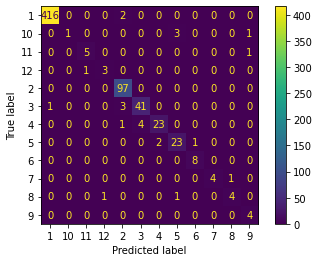

In [232]:
%%time
#Before feature selection (On whole data set)
fit_model(xbg_classifier,X_train,x,y_train,y)

[0]	validation_0-merror:0.15644
[20]	validation_0-merror:0.05215
[40]	validation_0-merror:0.03528
[60]	validation_0-merror:0.03221


C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[80]	validation_0-merror:0.02914
[89]	validation_0-merror:0.03068
Accuracy: 97.0859%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       418
          10       1.00      0.20      0.33         5
          11       0.83      0.83      0.83         6
          12       1.00      0.75      0.86         4
           2       0.96      1.00      0.98        97
           3       0.91      0.96      0.93        45
           4       1.00      0.86      0.92        28
           5       0.96      0.92      0.94        26
           6       0.58      0.88      0.70         8
           7       0.83      1.00      0.91         5
           8       1.00      0.67      0.80         6
           9       0.57      1.00      0.73         4

    accuracy                           0.97       652
   macro avg       0.89      0.84      0.83       652
weighted avg       0.98      0.97      0.97       652



C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


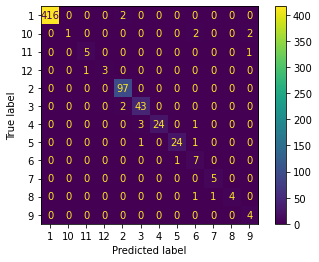

In [236]:
#After feature selection (On whole data set)
fit_model(xbg_classifier,X_train_fe,x_fe,y_train,y)

[0]	validation_0-merror:0.19084
[20]	validation_0-merror:0.15267
[40]	validation_0-merror:0.14504


C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 85.4962%
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        87
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          12       1.00      0.50      0.67         2
           2       0.72      1.00      0.84        13
           3       0.56      0.71      0.63         7
           4       1.00      0.20      0.33         5
           5       0.71      0.71      0.71         7
           6       0.20      0.50      0.29         2
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         0

    accuracy                           0.85       131
   macro avg       0.52      0.47      0.45       131
weighted avg       0.87      0.85      0.85       131



C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

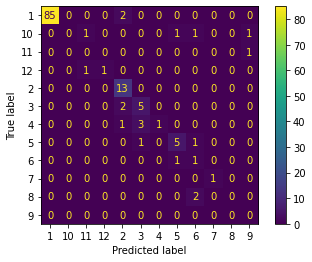

In [235]:
#After feature selection (On testing data set)
fit_model(xbg_classifier,X_train_fe,X_test_fe,y_train,y_test)

In [129]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, num_class=13,
 objective= 'multi:softmax', nthread=4, seed=0), 
param_grid = param_test1, scoring='f1_macro',n_jobs=4, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'max_depth': 7, 'min_child_weight': 1}, 0.48341846982625114)

In [131]:
param_test2 = {
 'max_depth':[6,7,8],
 'min_child_weight':[0,1,2]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, num_class=13,
 objective= 'multi:softmax', nthread=4, seed=0), 
 param_grid = param_test2, scoring='f1_macro',n_jobs=4, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:31:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'max_depth': 7, 'min_child_weight': 0}, 0.49541792296998033)

In [132]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,7)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=7,
 min_child_weight=0, gamma=0, subsample=0.8, colsample_bytree=0.8, num_class=13,
 objective= 'multi:softmax', nthread=4, seed=0), 
 param_grid = param_test3, scoring='f1_macro',n_jobs=4, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'gamma': 0.4}, 0.49889189805677364)

In [133]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=7,
 min_child_weight=0, gamma=0.4, subsample=0.8, colsample_bytree=0.8, num_class=13,
 objective= 'multi:softmax', nthread=4, seed=0), 
 param_grid = param_test4, scoring='f1_macro',n_jobs=4, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:32:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'colsample_bytree': 0.8, 'subsample': 0.8}, 0.49889189805677364)

In [134]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=7,
 min_child_weight=0, gamma=0.4, subsample=0.8, colsample_bytree=0.8, num_class=13,
 objective= 'multi:softmax', nthread=4, seed=0), 
 param_grid = param_test5, scoring='f1_macro',n_jobs=4, cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.best_params_, gsearch5.best_score_

C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:33:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'colsample_bytree': 0.75, 'subsample': 0.75}, 0.5127385289575692)

In [135]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=7,
 min_child_weight=0, gamma=0.4, subsample=0.75, colsample_bytree=0.75,num_class=13,
 objective= 'multi:softmax', nthread=4,seed=0), 
 param_grid = param_test6, scoring='f1_macro',n_jobs=4, cv=5)
gsearch6.fit(X_train,y_train)
gsearch6.best_params_, gsearch6.best_score_

C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:34:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'reg_alpha': 1e-05}, 0.5127385289575692)

In [136]:
param_test7 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch7 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=7,
 min_child_weight=0, gamma=0.4, subsample=0.75, colsample_bytree=0.75,num_class=13,
 objective= 'multi:softmax', nthread=4,seed=0), 
 param_grid = param_test7, scoring='f1_macro',n_jobs=4, cv=5)
gsearch7.fit(X_train,y_train)
gsearch7.best_params_, gsearch7.best_score_

C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:34:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'reg_alpha': 0}, 0.5127385289575692)

[0]	validation_0-merror:0.19084
[20]	validation_0-merror:0.15267
[40]	validation_0-merror:0.14504


C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-define

Accuracy: 85.4962%
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        87
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          12       1.00      0.50      0.67         2
           2       0.72      1.00      0.84        13
           3       0.56      0.71      0.63         7
           4       1.00      0.20      0.33         5
           5       0.71      0.71      0.71         7
           6       0.20      0.50      0.29         2
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         0

    accuracy                           0.85       131
   macro avg       0.52      0.47      0.45       131
weighted avg       0.87      0.85      0.85       131

Wall time: 310 ms


C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


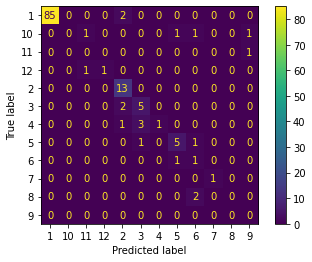

In [237]:
%%time
#Before tuning on testing set
fit_model(xbg_classifier,X_train_fe,X_test_fe,y_train_fe,y_test_fe)

[0]	validation_0-merror:0.15644
[20]	validation_0-merror:0.05215
[40]	validation_0-merror:0.03528
[60]	validation_0-merror:0.03221
[80]	validation_0-merror:0.02914


C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[90]	validation_0-merror:0.03068
Accuracy: 97.0859%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       418
          10       1.00      0.20      0.33         5
          11       0.83      0.83      0.83         6
          12       1.00      0.75      0.86         4
           2       0.96      1.00      0.98        97
           3       0.91      0.96      0.93        45
           4       1.00      0.86      0.92        28
           5       0.96      0.92      0.94        26
           6       0.58      0.88      0.70         8
           7       0.83      1.00      0.91         5
           8       1.00      0.67      0.80         6
           9       0.57      1.00      0.73         4

    accuracy                           0.97       652
   macro avg       0.89      0.84      0.83       652
weighted avg       0.98      0.97      0.97       652

Wall time: 539 ms


C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


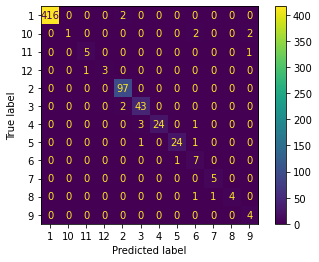

In [239]:
%%time
#Before tuning on whole data set
fit_model(xbg_classifier,X_train_fe,x_fe,y_train_fe,y)

In [190]:
#Hyperparameters values for XGBoost classifier after tuning
xgb_aftertune = xgb.XGBClassifier(
learning_rate =0.1,
 n_estimators=1000,
 max_depth=7,
 min_child_weight=0,
 gamma=0.4,
 subsample=0.75,
 colsample_bytree=0.75,
 objective= 'multi:softmax',
 nthread=4,
reg_alpha=0.05,
num_class=13,
 seed=0)

[0]	validation_0-merror:0.19847
[20]	validation_0-merror:0.13740
[40]	validation_0-merror:0.12977
[60]	validation_0-merror:0.12214


C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[62]	validation_0-merror:0.12214
Accuracy: 87.7863%
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        87
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         2
           2       0.76      1.00      0.87        13
           3       0.56      0.71      0.63         7
           4       1.00      0.40      0.57         5
           5       0.75      0.86      0.80         7
           6       0.25      0.50      0.33         2
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         0

    accuracy                           0.88       131
   macro avg       0.53      0.54      0.52       131
weighted avg       0.87      0.88      0.87       131

Wall time: 550 ms


C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

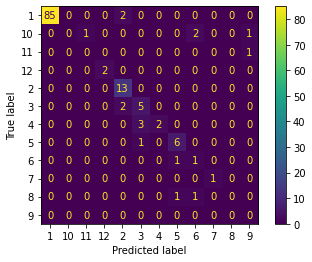

In [238]:
%%time
#After tuning on testing set
fit_model(xgb_aftertune,X_train_fe,X_test_fe,y_train_fe,y_test_fe)

[0]	validation_0-merror:0.13190
[20]	validation_0-merror:0.03681
[40]	validation_0-merror:0.02607
[60]	validation_0-merror:0.02454


C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[63]	validation_0-merror:0.02454
Accuracy: 97.5460%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       418
          10       1.00      0.20      0.33         5
          11       0.83      0.83      0.83         6
          12       1.00      1.00      1.00         4
           2       0.96      1.00      0.98        97
           3       0.91      0.96      0.93        45
           4       1.00      0.89      0.94        28
           5       0.93      0.96      0.94        26
           6       0.70      0.88      0.78         8
           7       1.00      1.00      1.00         5
           8       1.00      0.67      0.80         6
           9       0.67      1.00      0.80         4

    accuracy                           0.98       652
   macro avg       0.92      0.87      0.86       652
weighted avg       0.98      0.98      0.97       652

Wall time: 572 ms


C:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


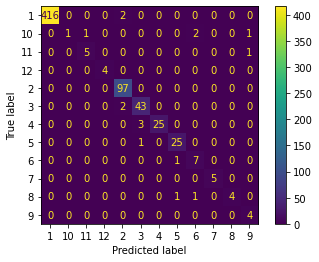

In [240]:
%%time
#After tuning on whole set
fit_model(xgb_aftertune,X_train_fe,x_fe,y_train,y)

In [222]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(y)

1       5
2      12
3      12
4      10
5      11
6       9
7      11
8      11
9      10
10      9
11     10
12     11
13     11
14      2
15      8
16      9
17     12
18     12
19     11
20      7
21      7
22      7
23      4
24      8
25      8
26      8
27      8
28      9
29      1
30      1
31      3
32      6
33      4
34      5
35      6
36      6
37      7
38      8
39      3
40      3
41      5
42      4
43      5
44      5
45      6
46      5
47      5
48      6
49      6
50     10
51     10
52      1
53      3
54      3
55      4
56      4
57      5
58      3
59      4
60      4
61      4
62      5
63      4
64      5
65      5
66      6
67      6
68      3
69      1
70      3
71      3
72      4
73      4
74      4
75      3
76      5
77      5
78      5
79      5
80      5
81      5
82      5
83      5
84      5
85      5
86      5
87      5
88      5
89      4
90      7
91      3
92      3
93      3
94      3
95      3
96      4
97      3
98      4
99      2
100     4
